**TEAM ID: PNT2022TMID30907**

**SPRINT - 3**

**Importing The ImageDataGenerator Library**

In [15]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [16]:
import keras 
from keras.preprocessing.image import ImageDataGenerator

**Define the parameters/arguments for ImageDataGenerator class**

In [17]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


**Applying ImageDataGenerator functionality to trainset**

In [18]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/DataSet/TrainSet',target_size=(128,128),batch_size=32, class_mode='binary')

Found 117 images belonging to 2 classes.


**Applying ImageDataGenerator functionality to testset**

In [19]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/DataSet/TestSet',target_size=(128,128),batch_size=32, class_mode='binary')

Found 117 images belonging to 2 classes.


**Import model building libraries**

In [20]:
#To define Linear initialisation import Sequential
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create Convolution kernel import Convolution2D 
from keras.layers import Convolution2D
#import Maxpooling layer
from keras.layers import MaxPooling2D 
#import flatten layer
from keras.layers import Flatten 
import warnings 
warnings.filterwarnings('ignore')


**Initializing the model**

In [21]:
model=Sequential()

**Add CNN Layer**

In [22]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu')) 
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())

**Add Hidden Layer**

In [23]:
#add hidden layer
model.add(Dense(150,activation='relu')) 
#add output layer 
model.add(Dense(1,activation='sigmoid'))

**Configure the learning process**

In [24]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

**Train the model**

In [25]:
model.fit_generator(x_train,steps_per_epoch=4,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
4/4 [==============================] - 47s 12s/step - loss: 8.9784 - accuracy: 0.5470 - val_loss: 6.9489 - val_accuracy: 0.4017
Epoch 2/10
4/4 [==============================] - 7s 2s/step - loss: 4.0332 - accuracy: 0.4957 - val_loss: 0.4255 - val_accuracy: 0.8034
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 0.8903 - accuracy: 0.6496 - val_loss: 1.2030 - val_accuracy: 0.6325
Epoch 4/10
4/4 [==============================] - 7s 2s/step - loss: 0.8589 - accuracy: 0.6325 - val_loss: 0.6902 - val_accuracy: 0.6325
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 0.5211 - accuracy: 0.6325 - val_loss: 0.4817 - val_accuracy: 0.6325
Epoch 6/10
4/4 [==============================] - 7s 2s/step - loss: 0.4718 - accuracy: 0.6496 - val_loss: 0.4918 - val_accuracy: 0.7949
Epoch 7/10
4/4 [==============================] - 9s 3s/step - loss: 0.4846 - accuracy: 0.8632 - val_loss: 0.4945 - val_accuracy: 0.8803
Epoch 8/10
4/4 [=======================

**Save The Model**

In [26]:
model.save("forestF1.h5")

**Predictions**

In [27]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from tensorflow.keras.preprocessing import image #import numpy
import numpy as np
#import cv2
import cv2

In [29]:
#load the saved model
model = load_model("forestF1.h5")

In [30]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/DataSet/TestSet/Forest/Forest (17).jpeg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [31]:
pred= model.predict(x)

1/1 [==============================] - 0s 114ms/step


In [32]:
pred

array([[0.00033332]], dtype=float32)

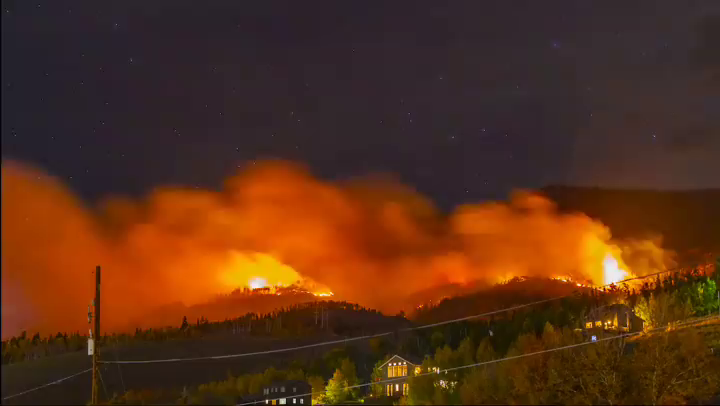

1/1 [==============================] - 0s 105ms/step
Forest fire


In [35]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from matplotlib import pyplot as plt
from PIL import Image
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/forestfireF1.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("forestF1.h5")
    cv2_imshow(frame)
    pred=model. predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

In [36]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.3 MB/s 


In [37]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=66b140013e408dde1218350dc2527aa232234e80547594930681619baecbe361
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [38]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='ACb2d4235f686873a722b463631f72f069'
  auth_token='4420a201ee6d29c8bbf876084dd91405'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='Forest Fire is Detected,Stay Alert!',
      #use twilio free number
      from_='+1 7174938724',
        #to number
        to='+91 98434 50890')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No danger')

Forest fire
SMbdec83e634bca46133c06e1e0eb0dd3b
Fire detected
SMS Sent!
